### Import data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
df= pd.read_csv('/content/drive/MyDrive/نسخة من BTCUSDT10years.csv')
#test = pd.read_csv('BTCUSDT (3).csv')
import matplotlib.pyplot as plt

%matplotlib inline
df

,Date,Open,High,Low,Close,Volume
0,2017-08-17 04:00:00,4261.48,4349.99,4261.32,4349.99,82.0
1,2017-08-17 08:00:00,4333.32,4485.39,4333.32,4427.30,64.0
2,2017-08-17 12:00:00,4436.06,4485.39,4333.42,4352.34,175.0
3,2017-08-17 16:00:00,4352.33,4354.84,4200.74,4325.23,225.0
4,2017-08-17 20:00:00,4307.56,4369.69,4258.56,4285.08,250.0
...,...,...,...,...,...,...
9418,2021-12-06 16:00:00,48942.67,49366.00,48653.05,49103.00,7912.0
9419,2021-12-06 20:00:00,49103.00,50891.11,48760.00,50441.92,9500.0
9420,2021-12-07 00:00:00,50441.91,51430.00,50332.62,50945.03,6585.0
9421,2021-12-07 04:00:00,50945.02,51335.16,50797.86,50907.27,4802.0


### Preprocess data

In [4]:
df = pd.concat([df.drop('Date', axis = 1), 
          (df.Date.str.split("-").str[:3].apply(pd.Series)
          .rename(columns={0:'year', 1:'month', 2:'day'}))], axis = 1)

In [5]:
df = pd.concat([df.drop('day', axis = 1), 
          (df.day.str.split(" ").str[:2].apply(pd.Series)
          .rename(columns={0:'day', 1:'hours'}))], axis = 1)


In [6]:

df['year']=df['year'].astype(float)
df['month']=df['month'].astype(float)
df['day']=df['day'].astype(float)
#df['hours']=df['hours'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9423 entries, 0 to 9422
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    9423 non-null   float64
 1   High    9423 non-null   float64
 2   Low     9423 non-null   float64
 3   Close   9423 non-null   float64
 4   Volume  9423 non-null   float64
 5   year    9423 non-null   float64
 6   month   9423 non-null   float64
 7   day     9423 non-null   float64
 8   hours   9423 non-null   object 
dtypes: float64(8), object(1)
memory usage: 662.7+ KB


In [7]:

df['hours']=pd.to_datetime(df['hours'])

      

In [8]:
df['hours'] = pd.to_numeric(df['hours'])


In [9]:
df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9423 entries, 0 to 9422
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    9423 non-null   float64
 1   High    9423 non-null   float64
 2   Low     9423 non-null   float64
 3   Close   9423 non-null   float64
 4   Volume  9423 non-null   float64
 5   year    9423 non-null   float64
 6   month   9423 non-null   float64
 7   day     9423 non-null   float64
 8   hours   9423 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 662.7 KB


In [10]:

# X= df.loc[1:3,['Low' , 'High' 'Clase ' , 'Open', 'Volume' ]]
df['Open1'] = df['Open'].shift(-1)
df['High1'] = df['High'].shift(-1)
df['Low1'] = df['Low'].shift(-1)
df['Close1'] = df['Close'].shift(-1)
df['Volume1'] = df['Volume'].shift(-1)
#######2
df['Open2'] = df['Open'].shift(-1)
df['High2'] = df['High'].shift(-1)
df['Low2'] = df['Low'].shift(-1)
df['Close2'] = df['Close'].shift(-1)
df['Volume2'] = df['Volume'].shift(-1)
#######3
df['Open3'] = df['Open'].shift(-1)
df['High3'] = df['High'].shift(-1)
df['Low3'] = df['Low'].shift(-1)
df['Close3'] = df['Close'].shift(-1)
df['Volume3'] = df['Volume'].shift(-1)
#######4
df['Open4'] = df['Open'].shift(-1)
df['High4'] = df['High'].shift(-1)
df['Low4'] = df['Low'].shift(-1)
df['Close4'] = df['Close'].shift(-1)
df['Volume4'] = df['Volume'].shift(-1)

df

,Open,High,Low,Close,Volume,year,month,day,hours,Open1,High1,Low1,Close1,Volume1,Open2,High2,Low2,Close2,Volume2,Open3,High3,Low3,Close3,Volume3,Open4,High4,Low4,Close4,Volume4
0,4261.48,4349.99,4261.32,4349.99,82.0,2017.0,8.0,17.0,1644292800000000000,4333.32,4485.39,4333.32,4427.30,64.0,4333.32,4485.39,4333.32,4427.30,64.0,4333.32,4485.39,4333.32,4427.30,64.0,4333.32,4485.39,4333.32,4427.30,64.0
1,4333.32,4485.39,4333.32,4427.30,64.0,2017.0,8.0,17.0,1644307200000000000,4436.06,4485.39,4333.42,4352.34,175.0,4436.06,4485.39,4333.42,4352.34,175.0,4436.06,4485.39,4333.42,4352.34,175.0,4436.06,4485.39,4333.42,4352.34,175.0
2,4436.06,4485.39,4333.42,4352.34,175.0,2017.0,8.0,17.0,1644321600000000000,4352.33,4354.84,4200.74,4325.23,225.0,4352.33,4354.84,4200.74,4325.23,225.0,4352.33,4354.84,4200.74,4325.23,225.0,4352.33,4354.84,4200.74,4325.23,225.0
3,4352.33,4354.84,4200.74,4325.23,225.0,2017.0,8.0,17.0,1644336000000000000,4307.56,4369.69,4258.56,4285.08,250.0,4307.56,4369.69,4258.56,4285.08,250.0,4307.56,4369.69,4258.56,4285.08,250.0,4307.56,4369.69,4258.56,4285.08,250.0
4,4307.56,4369.69,4258.56,4285.08,250.0,2017.0,8.0,17.0,1644350400000000000,4285.08,4340.62,4134.61,4292.39,276.0,4285.08,4340.62,4134.61,4292.39,276.0,4285.08,4340.62,4134.61,4292.39,276.0,4285.08,4340.62,4134.61,4292.39,276.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9418,48942.67,49366.00,48653.05,49103.00,7912.0,2021.0,12.0,6.0,1644336000000000000,49103.00,50891.11,48760.00,50441.92,9500.0,49103.00,50891.11,48760.00,50441.92,9500.0,49103.00,50891.11,48760.00,50441.92,9500.0,49103.00,50891.11,48760.00,50441.92,9500.0
9419,49103.00,50891.11,48760.00,50441.92,9500.0,2021.0,12.0,6.0,1644350400000000000,50441.91,51430.00,50332.62,50945.03,6585.0,50441.91,51430.00,50332.62,50945.03,6585.0,50441.91,51430.00,50332.62,50945.03,6585.0,50441.91,51430.00,50332.62,50945.03,6585.0
9420,50441.91,51430.00,50332.62,50945.03,6585.0,2021.0,12.0,7.0,1644278400000000000,50945.02,51335.16,50797.86,50907.27,4802.0,50945.02,51335.16,50797.86,50907.27,4802.0,50945.02,51335.16,50797.86,50907.27,4802.0,50945.02,51335.16,50797.86,50907.27,4802.0
9421,50945.02,51335.16,50797.86,50907.27,4802.0,2021.0,12.0,7.0,1644292800000000000,50907.27,51066.86,50810.03,51040.65,462.0,50907.27,51066.86,50810.03,51040.65,462.0,50907.27,51066.86,50810.03,51040.65,462.0,50907.27,51066.86,50810.03,51040.65,462.0


In [11]:
    import sklearn
    import pandas as pd
    from sklearn.impute import SimpleImputer
    import numpy as np
    from subprocess import check_output
    #from sklearn.preprocessing  import Imputer

    import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline


    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC, LinearSVC
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.linear_model import Perceptron
    from sklearn.linear_model import SGDClassifier
    from sklearn.tree import DecisionTreeClassifier

In [12]:
### Regression 
#y= df.loc[4 , ['Close' ]]
imputer = SimpleImputer(missing_values=np.nan, strategy='mean',verbose=0)
df=df


In [13]:
#soso=df.isnull().sum()
#soso
imputer = imputer.fit(df.iloc[:,7:29])
df.iloc[:,7:29]=imputer.transform(df.iloc[:,7:29])
soso=df.isnull().sum() 
soso

Open       0
High       0
Low        0
Close      0
Volume     0
year       0
month      0
day        0
hours      0
Open1      0
High1      0
Low1       0
Close1     0
Volume1    0
Open2      0
High2      0
Low2       0
Close2     0
Volume2    0
Open3      0
High3      0
Low3       0
Close3     0
Volume3    0
Open4      0
High4      0
Low4       0
Close4     0
Volume4    0
dtype: int64

In [14]:
df=df.drop(['Low4','Open4','High4' , 'Volume4'], axis =1)

In [15]:

X = df.loc[:, df.columns != 'Close4']
#X = df['Date','Open','High','Low','Volume','Quote_Volume','Trades_Count','div','Log_VolumeGain']

X



,Open,High,Low,Close,Volume,year,month,day,hours,Open1,High1,Low1,Close1,Volume1,Open2,High2,Low2,Close2,Volume2,Open3,High3,Low3,Close3,Volume3
0,4261.48,4349.99,4261.32,4349.99,82.0,2017.0,8.0,17.0,1.644293e+18,4333.320000,4485.39000,4333.320000,4427.300000,64.000000,4333.320000,4485.39000,4333.320000,4427.300000,64.000000,4333.320000,4485.39000,4333.320000,4427.300000,64.000000
1,4333.32,4485.39,4333.32,4427.30,64.0,2017.0,8.0,17.0,1.644307e+18,4436.060000,4485.39000,4333.420000,4352.340000,175.000000,4436.060000,4485.39000,4333.420000,4352.340000,175.000000,4436.060000,4485.39000,4333.420000,4352.340000,175.000000
2,4436.06,4485.39,4333.42,4352.34,175.0,2017.0,8.0,17.0,1.644322e+18,4352.330000,4354.84000,4200.740000,4325.230000,225.000000,4352.330000,4354.84000,4200.740000,4325.230000,225.000000,4352.330000,4354.84000,4200.740000,4325.230000,225.000000
3,4352.33,4354.84,4200.74,4325.23,225.0,2017.0,8.0,17.0,1.644336e+18,4307.560000,4369.69000,4258.560000,4285.080000,250.000000,4307.560000,4369.69000,4258.560000,4285.080000,250.000000,4307.560000,4369.69000,4258.560000,4285.080000,250.000000
4,4307.56,4369.69,4258.56,4285.08,250.0,2017.0,8.0,17.0,1.644350e+18,4285.080000,4340.62000,4134.610000,4292.390000,276.000000,4285.080000,4340.62000,4134.610000,4292.390000,276.000000,4285.080000,4340.62000,4134.610000,4292.390000,276.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9418,48942.67,49366.00,48653.05,49103.00,7912.0,2021.0,12.0,6.0,1.644336e+18,49103.000000,50891.11000,48760.000000,50441.920000,9500.000000,49103.000000,50891.11000,48760.000000,50441.920000,9500.000000,49103.000000,50891.11000,48760.000000,50441.920000,9500.000000
9419,49103.00,50891.11,48760.00,50441.92,9500.0,2021.0,12.0,6.0,1.644350e+18,50441.910000,51430.00000,50332.620000,50945.030000,6585.000000,50441.910000,51430.00000,50332.620000,50945.030000,6585.000000,50441.910000,51430.00000,50332.620000,50945.030000,6585.000000
9420,50441.91,51430.00,50332.62,50945.03,6585.0,2021.0,12.0,7.0,1.644278e+18,50945.020000,51335.16000,50797.860000,50907.270000,4802.000000,50945.020000,51335.16000,50797.860000,50907.270000,4802.000000,50945.020000,51335.16000,50797.860000,50907.270000,4802.000000
9421,50945.02,51335.16,50797.86,50907.27,4802.0,2021.0,12.0,7.0,1.644293e+18,50907.270000,51066.86000,50810.030000,51040.650000,462.000000,50907.270000,51066.86000,50810.030000,51040.650000,462.000000,50907.270000,51066.86000,50810.030000,51040.650000,462.000000


#### explore data

In [16]:
### Regression 
y = df['Close4']
y


0        4427.300000
1        4352.340000
2        4325.230000
3        4285.080000
4        4292.390000
            ...     
9418    50441.920000
9419    50945.030000
9420    50907.270000
9421    51040.650000
9422    16939.061326
Name: Close4, Length: 9423, dtype: float64

Text(0.5, 1.0, 'Close')

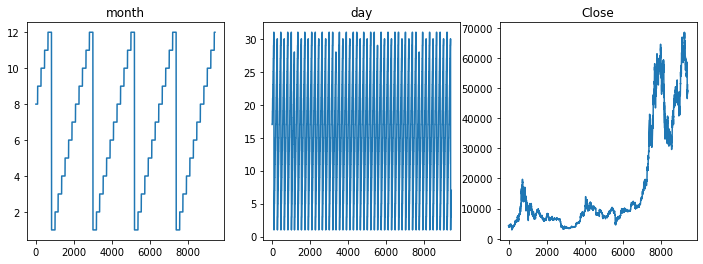

In [17]:
# Go through those columns with missing data
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(df['month'])
axes[0].set_title("month")

axes[1].plot(df['day'])
axes[1].set_title("day")

axes[2].plot(df['Close'])
axes[2].set_title("Close")

#### data scaling

In [19]:
# Normlization 

### ........date ! 

data=df
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

data.iloc[:,0:5]=min_max.fit_transform(data.iloc[:,0:5])
data.iloc[:,9:29]=min_max.fit_transform(data.iloc[:,9:29])


data

,Open,High,Low,Close,Volume,year,month,day,hours,Open1,High1,Low1,Close1,Volume1,Open2,High2,Low2,Close2,Volume2,Open3,High3,Low3,Close3,Volume3,Close4
0,0.021192,0.018253,0.022285,0.021824,0.000628,2017.0,8.0,17.0,1.644293e+18,0.022286,0.020309,0.023396,0.023003,0.000479,0.022286,0.020309,0.023396,0.023003,0.000479,0.022286,0.020309,0.023396,0.023003,0.000479,0.023003
1,0.022286,0.020309,0.023396,0.023003,0.000479,2017.0,8.0,17.0,1.644307e+18,0.023852,0.020309,0.023398,0.021859,0.001396,0.023852,0.020309,0.023398,0.021859,0.001396,0.023852,0.020309,0.023398,0.021859,0.001396,0.021859
2,0.023852,0.020309,0.023398,0.021859,0.001396,2017.0,8.0,17.0,1.644322e+18,0.022576,0.018327,0.021351,0.021446,0.001809,0.022576,0.018327,0.021351,0.021446,0.001809,0.022576,0.018327,0.021351,0.021446,0.001809,0.021446
3,0.022576,0.018327,0.021351,0.021446,0.001809,2017.0,8.0,17.0,1.644336e+18,0.021894,0.018552,0.022243,0.020834,0.002016,0.021894,0.018552,0.022243,0.020834,0.002016,0.021894,0.018552,0.022243,0.020834,0.002016,0.020834
4,0.021894,0.018552,0.022243,0.020834,0.002016,2017.0,8.0,17.0,1.644350e+18,0.021551,0.018111,0.020330,0.020945,0.002231,0.021551,0.018111,0.020330,0.020945,0.002231,0.021551,0.018111,0.020330,0.020945,0.002231,0.020945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9418,0.702109,0.701847,0.707236,0.704336,0.065320,2021.0,12.0,6.0,1.644336e+18,0.704552,0.725006,0.708886,0.724755,0.078440,0.704552,0.725006,0.708886,0.724755,0.078440,0.704552,0.725006,0.708886,0.724755,0.078440,0.724755
9419,0.704552,0.725006,0.708886,0.724755,0.078440,2021.0,12.0,6.0,1.644350e+18,0.724957,0.733190,0.733151,0.732428,0.054356,0.724957,0.733190,0.733151,0.732428,0.054356,0.724957,0.733190,0.733151,0.732428,0.054356,0.732428
9420,0.724957,0.733190,0.733151,0.732428,0.054356,2021.0,12.0,7.0,1.644278e+18,0.732624,0.731749,0.740330,0.731852,0.039625,0.732624,0.731749,0.740330,0.731852,0.039625,0.732624,0.731749,0.740330,0.731852,0.039625,0.731852
9421,0.732624,0.731749,0.740330,0.731852,0.039625,2021.0,12.0,7.0,1.644293e+18,0.732049,0.727675,0.740517,0.733886,0.003768,0.732049,0.727675,0.740517,0.733886,0.003768,0.732049,0.727675,0.740517,0.733886,0.003768,0.733886


In [20]:
# use MinMaxScaler to scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#split data
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 20)

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

### Train data with cross validation

In [21]:
from sklearn.model_selection import cross_val_score
scores = {}
cv_s= {}

#### K-neighbors regression

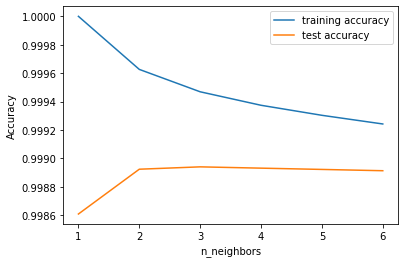

In [22]:
from sklearn.neighbors import KNeighborsRegressor
training_accuracy = []
test_accuracy = []
neighbor_seetings = range(1,7)

for x in neighbor_seetings:
    knr = KNeighborsRegressor(n_neighbors = x)
    knr.fit(X_train, y_train)
    training_accuracy.append(knr.score(X_train, y_train))
    test_accuracy.append(knr.score(X_test,y_test))

# Show the relationship of accuarcy and n_neighbors
plt.plot(neighbor_seetings, training_accuracy, label = 'training accuracy')
plt.plot(neighbor_seetings, test_accuracy, label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel('n_neighbors')
plt.legend()

In [23]:
# The best n_neighbors is 3
scores['K-neighbors regression'] = [training_accuracy[2],test_accuracy[2]]

In [24]:
# Cross Validation
knr = KNeighborsRegressor(n_neighbors = 3)
cv_scores = cross_val_score(knr, X_train, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(knr, X_test, y_test,cv = 5)
cv_s['K-neighbors regression']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.99884136 0.99875786 0.99866753 0.99880963 0.99875507]
Mean cross-validation training score (5-fold): 0.999


#### Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)
print('Train score: {}'.format(lr.score(X_train, y_train)))
print('Test score: {}'.format(lr.score(X_test,y_test)))
scores['LinearRegression']=[lr.score(X_train, y_train),lr.score(X_test,y_test)]

Train score: 1.0
Test score: 1.0


In [26]:
# Cross Validation
cv_scores = cross_val_score(lr, X_train, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(lr, X_test, y_test,cv = 5)
cv_s['LinearRegression']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [1. 1. 1. 1. 1.]
Mean cross-validation training score (5-fold): 1.000


#### Ridge

In [27]:
# Alpha by default is 1.0
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
print('Train score: {}'.format(ridge.score(X_train, y_train)))
print('Test score: {}'.format(ridge.score(X_test,y_test)))

Train score: 0.999914841647661
Test score: 0.9999178520562726


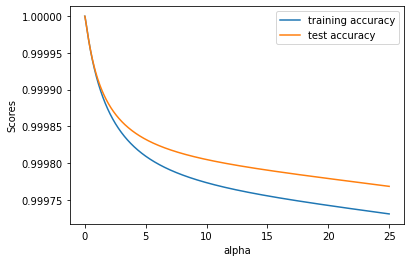

In [28]:
a =np.linspace(0.001,25,1000)
training_accuracy = []
test_accuracy = []
for x in a:
    ridge = Ridge(alpha = x)
    ridge.fit(X_train, y_train)
    training_accuracy.append(ridge.score(X_train, y_train))
    test_accuracy.append(ridge.score(X_test,y_test))
    
plt.plot(a, training_accuracy, label = 'training accuracy')
plt.plot(a, test_accuracy, label = 'test accuracy')
plt.ylabel("Scores")
plt.xlabel('alpha')
plt.legend()

In [29]:
# Use GridSearchCV to find the best alpha
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
param_grid = {'alpha':[0.001,0.01, 0.1,1]}

grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

#use gridsearch to get the best parameters, alpha=0.001
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'alpha': 0.001}
Best score 1.00


Best alpha is 0.001

In [30]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train, y_train)
scores['Ridge']=[ridge.score(X_train, y_train),ridge.score(X_test,y_test)]

In [31]:
# Cross Validation
cv_scores = cross_val_score(ridge, X_train, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(ridge, X_test, y_test,cv = 5)
cv_s['Ridge']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [1.         0.99999999 0.99999999 1.         0.99999999]
Mean cross-validation training score (5-fold): 1.000


#### Lasso

In [32]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter = 100000)
lasso.fit(X_train, y_train)
print('Train score: {}'.format(lasso.score(X_train, y_train)))
print('Test score: {}'.format(lasso.score(X_test,y_test)))
print('Number of features used: {}'.format(np.sum(lasso.coef_ != 0)))

Train score: 0.0
Test score: -2.113088828581411e-06
Number of features used: 0


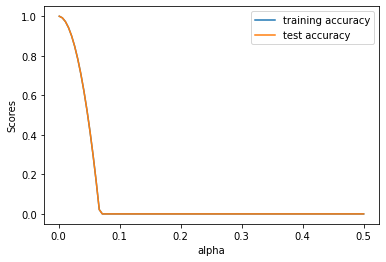

In [33]:
a =np.linspace(0.001,0.5,100)
training_accuracy = []
test_accuracy = []
f = []
for x in a:
    lasso = Lasso(alpha = x, max_iter = 100000)
    lasso.fit(X_train, y_train)
    training_accuracy.append(lasso.score(X_train, y_train))
    test_accuracy.append(lasso.score(X_test,y_test))
    f.append(np.sum(lasso.coef_!=0))
plt.plot(a, training_accuracy, label = 'training accuracy')
plt.plot(a, test_accuracy, label = 'test accuracy')
plt.ylabel("Scores")
plt.xlabel('alpha')
plt.legend()

In [34]:
lasso = Lasso(max_iter = 100000)
param_grid = {'alpha':[0.017, 0.02, 0.023, 0.026]}

grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {}'.format(grid_search.best_score_))

Best parameters{'alpha': 0.017}
Best score 0.9357149819834414


In [35]:
lasso = Lasso(alpha = 0.023,max_iter = 100000)
lasso.fit(X_train, y_train)
scores['Lasso']=[lasso.score(X_train, y_train),lasso.score(X_test,y_test)]

In [36]:
# Cross Validation
cv_scores = cross_val_score(lasso, X_train, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(lasso, X_test, y_test,cv = 5)
cv_s['Lasso']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.88550195 0.88070742 0.8838296  0.87773434 0.88518233]
Mean cross-validation training score (5-fold): 0.883


#### Polynomial Regression

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_py, X_test_py, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 20)

linreg = LinearRegression()
linreg.fit(X_train_py, y_train)
print('Polynomial LinearRegression')
print('Train score: {}'.format(linreg.score(X_train_py, y_train)))
print('Test score: {}\n'.format(linreg.score(X_test_py,y_test)))
scores['Polynomial deg 2 LinearRegression']=[linreg.score(X_train_py, y_train),linreg.score(X_test_py,y_test)]

linridge = Ridge()
linridge.fit(X_train_py, y_train)
print('Polynomial Ridge Regression')
print('Train score: {}'.format(linridge.score(X_train_py, y_train)))
print('Test score: {}\n'.format(linridge.score(X_test_py,y_test)))
scores['Polynomial deg 2 Ridge Regression']=[linridge.score(X_train_py, y_train),linridge.score(X_test_py,y_test)]

linlasso = Lasso()
linlasso.fit(X_train_py, y_train)
print('Polynomial Lasso Regression')
print('Train score: {}'.format(linlasso.score(X_train_py, y_train)))
print('Test score: {}'.format(linlasso.score(X_test_py,y_test)))
scores['Polynomial deg 2 Lasso Regression']=[linlasso.score(X_train_py, y_train),linlasso.score(X_test_py,y_test)]

Polynomial LinearRegression
Train score: 0.9999999997747655
Test score: 0.9999999997860216

Polynomial Ridge Regression
Train score: 0.9999999995868907
Test score: 0.9999999996043937

Polynomial Lasso Regression
Train score: 0.9999579061772131
Test score: 0.9999599315021154


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.052e-01, tolerance: 5.032e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [39]:
# Cross Validation
cv_scores = cross_val_score(linreg, X_train_py, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(linreg, X_test_py, y_test,cv = 5)
cv_s['Polynomial deg 2 LinearRegression']=[np.mean(cv_scores),np.mean(cv_test_scores)]

cv_scores = cross_val_score(linridge, X_train_py, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(linridge, X_test_py, y_test,cv = 5)
cv_s['Polynomial deg 2 Ridge Regression']=[np.mean(cv_scores),np.mean(cv_test_scores)]

cv_scores = cross_val_score(linlasso, X_train_py, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(linlasso, X_test_py, y_test,cv = 5)
cv_s['Polynomial deg 2 Lasso Regression']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [1. 1. 1. 1. 1.]
Mean cross-validation training score (5-fold): 1.000
Cross-validation training scores (5-fold): [1. 1. 1. 1. 1.]
Mean cross-validation training score (5-fold): 1.000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.381e-02, tolerance: 4.074e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.366e-02, tolerance: 3.992e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

Cross-validation training scores (5-fold): [0.99996004 0.99996169 0.99751692 0.99995845 0.99996278]
Mean cross-validation training score (5-fold): 0.999


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.257e-02, tolerance: 1.021e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.241e-02, tolerance: 1.009e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

#### SVR


In [40]:
from sklearn.svm import SVR
# SVM, with kernel: (linear)
svr = SVR(kernel = 'linear')
svr.fit(X_train, y_train)
print('Train score: {}'.format(svr.score(X_train, y_train)))
print('Test score: {}\n'.format(svr.score(X_test,y_test)))
scores['SVM']=[svr.score(X_train, y_train),svr.score(X_test,y_test)]

Train score: 0.9208723094225781
Test score: 0.9210268084635844



In [41]:
cv_scores = cross_val_score(svr, X_train, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(svr, X_test, y_test,cv = 5)
cv_s['SVM']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Cross-validation training scores (5-fold): [0.92278914 0.9214023  0.91246497 0.92677804 0.91591087]
Mean cross-validation training score (5-fold): 0.920


In [42]:
# SVR without kernel
from sklearn.svm import LinearSVR
lsvr = LinearSVR()
lsvr.fit(X_train, y_train)
print('Train score: {}'.format(lsvr.score(X_train, y_train)))
print('Test score: {}\n'.format(lsvr.score(X_test,y_test)))
scores['SVM without kernel']=[lsvr.score(X_train, y_train),lsvr.score(X_test,y_test)]

Train score: 0.9999999999963937
Test score: 0.9999999999963015



In [43]:
# Cross Validation
cv_scores = cross_val_score(lsvr, X_train, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))
cv_test_scores = cross_val_score(lsvr, X_test, y_test,cv = 5)
cv_s['SVM without kernel']=[np.mean(cv_scores),np.mean(cv_test_scores)]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Cross-validation training scores (5-fold): [1. 1. 1. 1. 1.]
Mean cross-validation training score (5-fold): 1.000


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


#### Evaluation

I think the Polynomial deg 2 Lasso Regression is the best model.

In [45]:
from sklearn.svm import SVR
# SVM, with kernel: (linear)
svr = SVR(kernel = 'poly' , degree =4 )
svr.fit(X_train, y_train)
print('Train score: {}'.format(svr.score(X_train, y_train)))
print('Test score: {}\n'.format(svr.score(X_test,y_test)))
scores['SVR _poly ']=[svr.score(X_train, y_train),svr.score(X_test,y_test)]


### poly ,  degree= 3  : 96% 
###  linear = 95% 
### degree =4: 97% 

Train score: 0.9629451890669392
Test score: 0.964017834893921



In [48]:
from sklearn.svm import SVR
# SVM, with kernel: (linear)
svr = SVR(kernel = 'poly' , degree =3 )
svr.fit(X_train, y_train)
print('Train score: {}'.format(svr.score(X_train, y_train)))
print('Test score: {}\n'.format(svr.score(X_test,y_test)))
scores['SVR _poly ']=[svr.score(X_train, y_train),svr.score(X_test,y_test)]


### poly ,  degree= 3  : 96% 
###  linear = 95% 
### degree =4: 97% 

Train score: 0.9578398896407103
Test score: 0.9594609195926375



In [51]:
from sklearn.svm import SVR
# SVM, with kernel: (linear)
svr = SVR(kernel = 'rbf' )
svr.fit(X_train, y_train)
print('Train score: {}'.format(svr.score(X_train, y_train)))
print('Test score: {}\n'.format(svr.score(X_test,y_test)))
scores['SVR _poly ']=[svr.score(X_train, y_train),svr.score(X_test,y_test)]


### poly ,  degree= 3  : 96% 
###  linear = 95% 
### degree =4: 97% 

Train score: 0.9797568234370745
Test score: 0.980224989513568



In [52]:
df = pd.DataFrame(scores).T
df.columns = ['Train Score','Test Score']
df = pd.concat([df,pd.DataFrame(cv_s,index = [['Cross_Validation_Train_Score','Cross_Validation_Test_Score']]).T],axis=1, join='inner')
df

,Train Score,Test Score,"(Cross_Validation_Train_Score,)","(Cross_Validation_Test_Score,)"
K-neighbors regression,0.999469,0.998941,0.998766,0.997160
LinearRegression,1.000000,1.000000,1.000000,1.000000
Ridge,1.000000,1.000000,1.000000,1.000000
Lasso,0.882809,0.882588,0.882591,0.885762
Polynomial deg 2 LinearRegression,1.000000,1.000000,1.000000,1.000000
Polynomial deg 2 Ridge Regression,1.000000,1.000000,1.000000,1.000000
Polynomial deg 2 Lasso Regression,0.999958,0.999960,0.999472,0.999897
SVM,0.962945,0.964018,0.919869,0.912932
SVM without kernel,1.000000,1.000000,1.000000,1.000000
